In [1]:
import numpy as np
import pandas as pd


In [2]:
credit_df = pd.read_csv('German_Credit_Data.csv')
credit_df.info()

# https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [3]:
credit_df.iloc[0:5,0:7]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,A11,6,A34,1169,A65,A75,4
1,A12,48,A32,5951,A61,A73,2
2,A14,12,A34,2096,A61,A74,2
3,A11,42,A32,7882,A61,A74,2
4,A11,24,A33,4870,A61,A73,3


In [4]:
credit_df.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [5]:
credit_df['status'].value_counts()

# 0 Good credit, 1 bad credit

0    700
1    300
Name: status, dtype: int64

In [6]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [7]:
encoded_credit_df = pd.get_dummies(credit_df[X_features],drop_first = True)

In [8]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [9]:
X = encoded_credit_df
y = credit_df['status']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

# criterion to gini, max_depth to 3  
# defaul values for other parameters.

modelDT = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)



In [12]:
modelDT.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=3)

# Measuring Test Accuracy

In [13]:
y_pred = modelDT.predict(X_test)

In [14]:
from sklearn import metrics
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

0.5835743204164258
0.7266666666666667


# Displaying the Tree

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

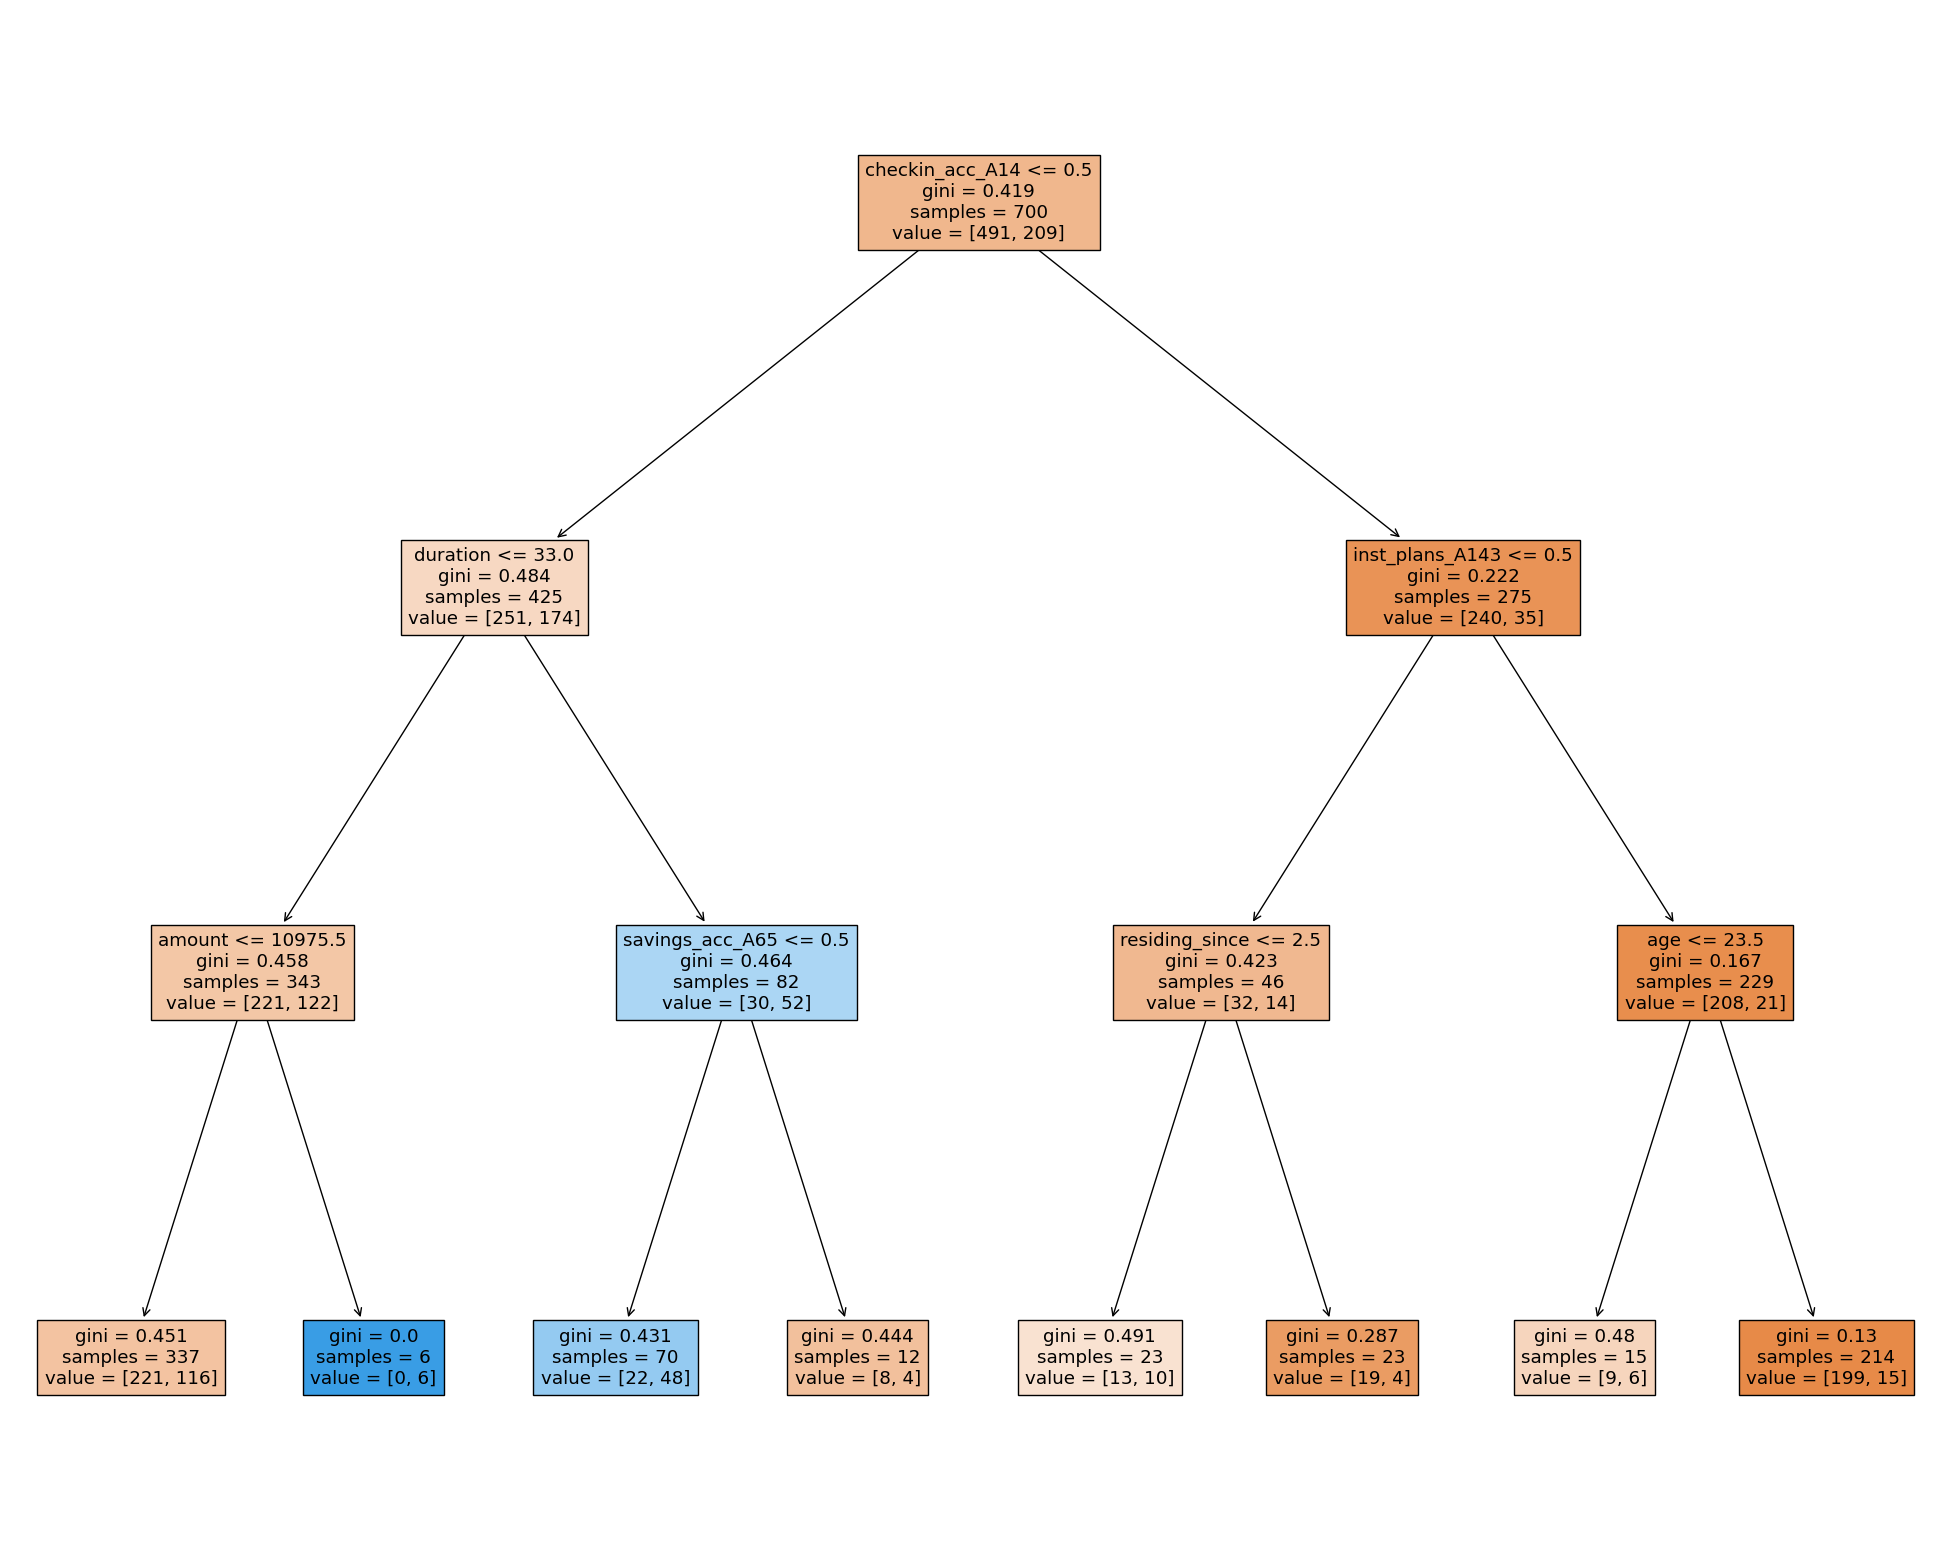

In [16]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(modelDT,feature_names=X_train.columns,
                   filled=True)

In [17]:
from sklearn.model_selection import GridSearchCV
param = [{'criterion':['gini','entropy'],'max_depth' : range(2,10)}]
model = DecisionTreeClassifier()
modelCV = GridSearchCV(model,param, cv = 10,scoring = 'roc_auc')

modelCV.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [18]:
modelCV.best_score_

0.6833090864917397

In [19]:
modelCV.best_params_

{'criterion': 'gini', 'max_depth': 4}

# Performance Measures - Decision Tree

In [20]:
pred_y = modelCV.predict(X_test)

In [21]:
print(metrics.confusion_matrix(y_test,y_pred))

[[198  11]
 [ 71  20]]


In [22]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       209
           1       0.65      0.22      0.33        91

    accuracy                           0.73       300
   macro avg       0.69      0.58      0.58       300
weighted avg       0.71      0.73      0.68       300



In [23]:
auc = metrics.roc_auc_score(y_test,modelCV.predict_proba(X_test)[:,1])
auc

0.7134181607865818

# Random Forests

In [24]:
no_of_feature = len(X_train.columns)


In [25]:
depth = int(np.log2(no_of_feature))
depth

4

In [26]:
## Importing Random Forest Classifier from the sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

## Initializing the Random Forest Classifier with max_dept and

## n_estimators

modelRF = RandomForestClassifier(max_depth = depth,n_estimators = 100,random_state = 101)

#max_depth - log2(no. of features),log()
modelRF.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, random_state=101)

In [27]:
auc = metrics.roc_auc_score(y_test,modelRF.predict_proba(X_test)[:,1])
auc

0.7701246122298755

# Grid Search

In [33]:
## Configuring parameters and values for searched
params = [{'max_depth' : [ 5,10,15],'n_estimators' : [50,100,150],
          'max_features' : ['sqrt',0.2,.3,.5]}]

# square root of number of features in the dataset
# 20%, 30%, 50% of the total no. of features
## Initializing the RF classifier

modelRF = RandomForestClassifier(random_state = 101)

## Configuring search with the tunable parameters

modelCV = GridSearchCV(modelRF,params,cv = 10,scoring= 'roc_auc')

## Fitting the training set

modelCV.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [ ]:
modelCV.best_score_

In [ ]:
modelCV.best_params_

### Building the model with best params

In [32]:
## Initializing the Random Forest Model with the optimal values

model_bp = RandomForestClassifier(max_depth = 10,n_estimators = 150,
                                 max_features = .3, oob_score  = True,
                                 random_state = 101)

## Fitting the model with the training set
# oob_score=True
# class balanced

model_bp.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features=0.3, n_estimators=150,
                       oob_score=True, random_state=101)